## 1.4.15 Image Segmentation with Watershed Algorithm


In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('coinC.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [15]:
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'sure_fg' is not defined

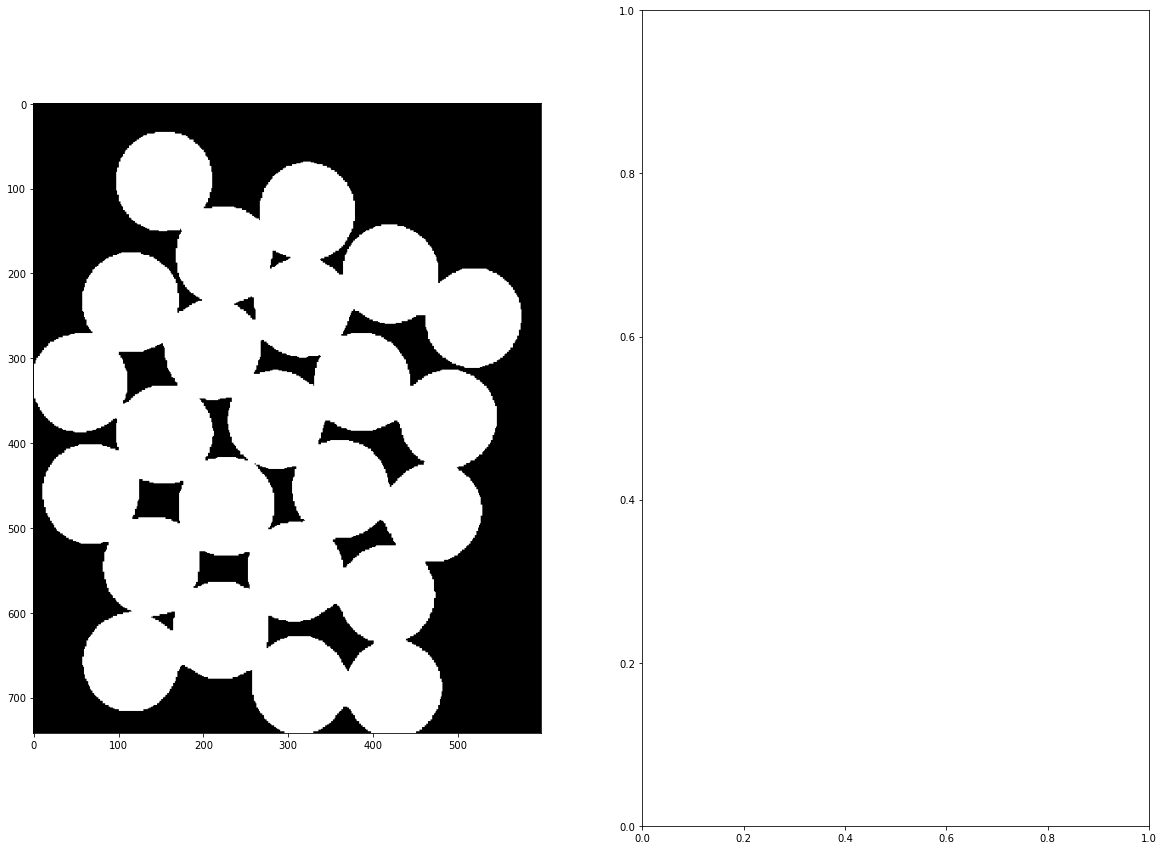

In [16]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.figure(figsize=(20,15))
plt.subplot(121),plt.imshow(opening,'gray')
plt.subplot(122),plt.imshow(sure_fg,'gray')
plt.show()

In [ ]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [ ]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [ ]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)